##**Aula 1:**

- Aprendemos o que é uma série temporal;

- Calculamos a taxa de crescimento de um evento em uma série temporal;

- Aprendemos o que é uma média móvel;

- Entendemos o que é correlação e função de autocorrelação.

Os dados foram retirados diretamente do [site do Governo do Estado de São Paulo](https://www.seade.gov.br/coronavirus/) (É uma base de dados sobre covid-19)

In [37]:
#importando as bibliotecas:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Parâmetros para formatação dos gráficos: 
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

Os dados estão disponíveis no [GitHub](https://github.com/vqrca/bootcamp_alura_aulas/blob/main/Modulo_3/dados_covid_sp.zip)

In [4]:
url = 'https://github.com/vqrca/bootcamp_alura_aulas/blob/main/Modulo_3/dados_covid_sp.zip?raw=true'

In [5]:
dados = pd.read_csv(url, sep = ';', compression='zip')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [7]:
#formatando os dados da coluna 'datahora':
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

Gráfico mostrando os números de casos de todos os municípios pela data: 

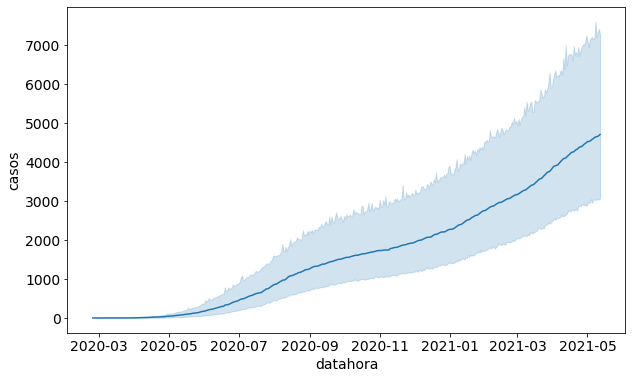

In [8]:
sns.lineplot(x='datahora', y='casos', data=dados)

A linha azul mais forte é a média pra todos os municípios. A faixa azul na parte superior representa o máximo de casos e na parte inferior representa o número mínimo de casos.

Escolhendo um munícipio específico:

In [9]:
dados_sp = dados.query('nome_munic == "São Paulo"')

Gráfico mostrando os números de casos em São Paulo pela data: 

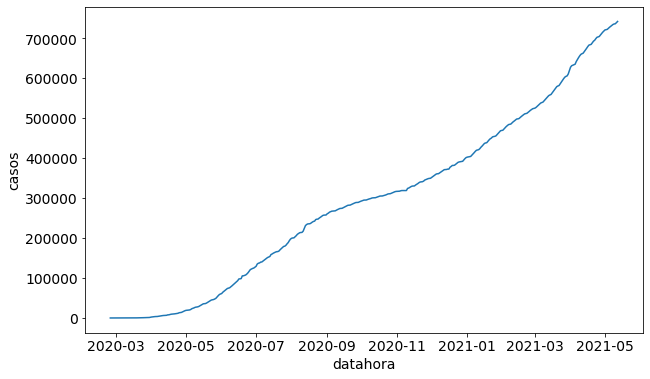

In [10]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)

Gráfico com eixo Y em log, para verificar se o aumento de casos é exponencial:

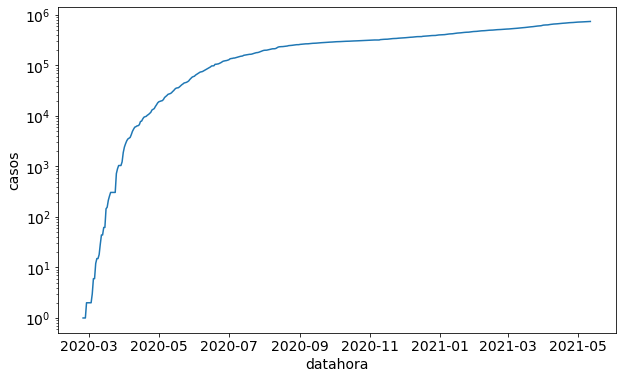

In [11]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log') #aplicando log no eixo y, para verificar se o crescimento é exponencial

No ínicio havia um crescimento exponencial, porém isso mudou ao longo do tempo

Anteriormente, analisamos os casos acumulados. Agora vamos fazer uma análise dos casos diários em São Paulo:

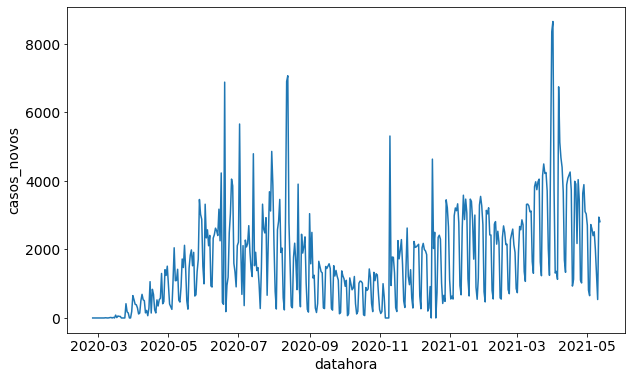

In [12]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)

Há algumas datas específicas onde há aumento do número de casos.

Fazendo a diferenciação se obtém o coeficiente angular: a taxa de crescimento, se há aumento ou diminuição. 
O método diff() é usado para calcular a diferença discreta entre os dados: 


In [13]:
#Taxa de crescimento de casos novos:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()


In [14]:
#Taxa de crescimento de óbitos novos:
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

Gráfico com a taxa de crescimento de casos novos em São Paulo: 

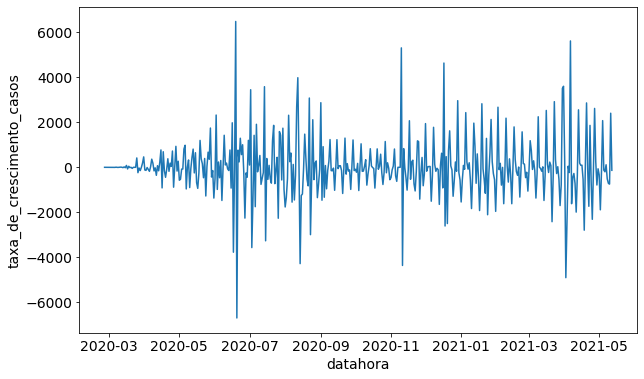

In [16]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)

Vemos que o número de casos está aumento ou diminuindo, dependendo do dia.

Gráfico com a taxa de crescimento de óbitos novos em São Paulo: 

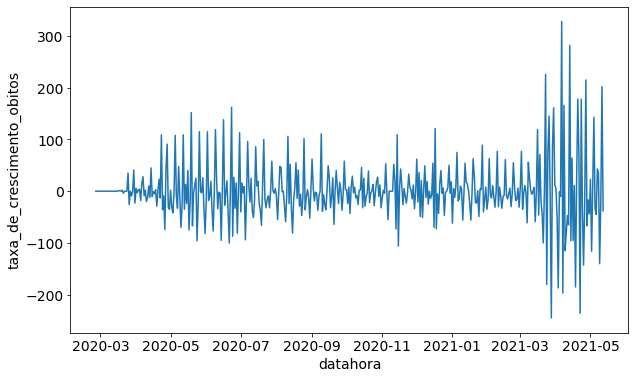

In [17]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

Visualização em gráfico de barras:

<BarContainer object of 443 artists>

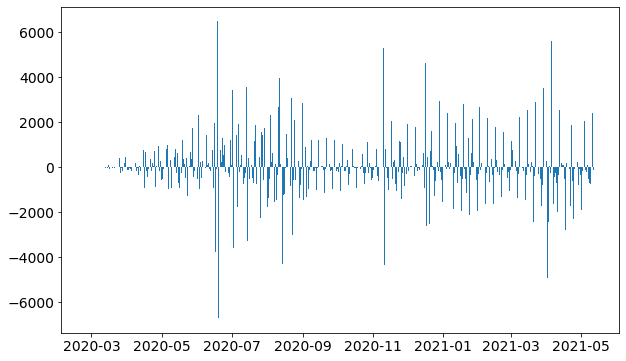

In [18]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

Separação dos dados de 2020 e 2021 para gerar uma visualização melhor:

In [19]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [20]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

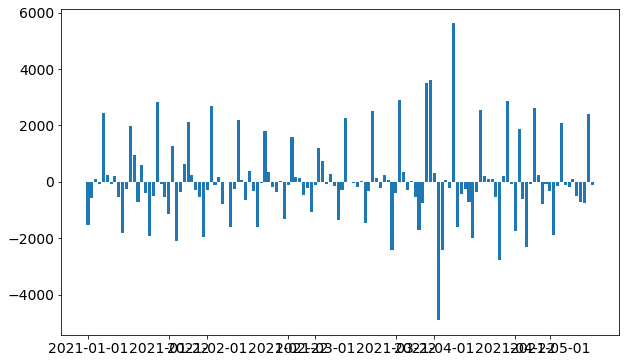

In [21]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

Como verificar as médias móveis, que consideram uma janela de tempo, suavizando o efeito dos picos?

Quando consideramos a média de 7 dias, nós diminuimos o efeito da sazonalidade, mostrando a tendência dos dados:

In [22]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

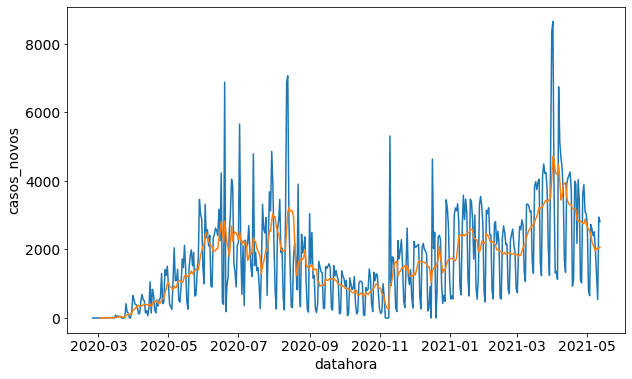

In [23]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)

Explorando o conceito de sazonalidade:

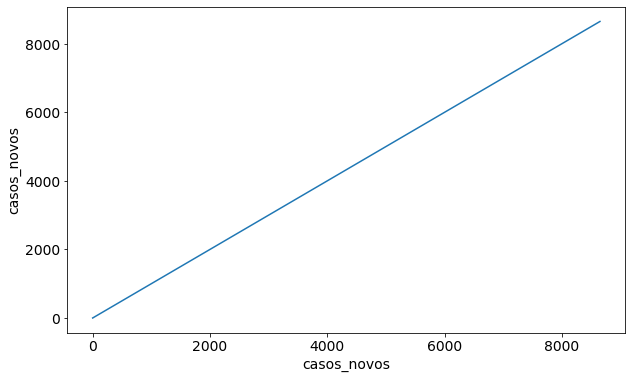

In [24]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

Correlação positiva e perfeita, pois estamos correlacionando duas coisas iguais.
Agora vamos ver se o número de casos está correlacionado ao número de óbitos:

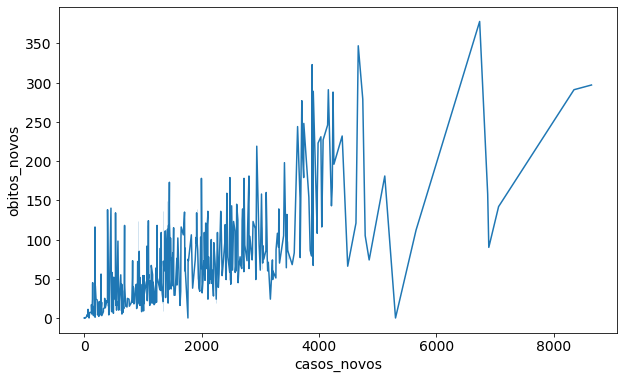

In [25]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

Os valores vão aumentando, mas não é uma reta.

Análise da sazonalidade nos meses de janeiro e fevereiro de 2021:

In [194]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

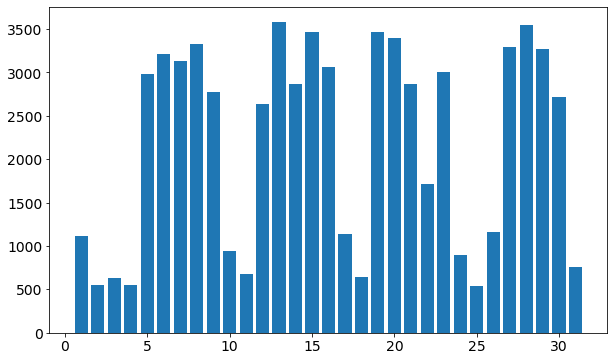

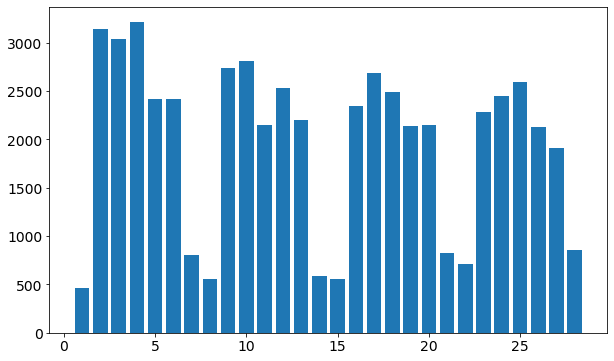

In [195]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])
plt.show()

Nesses gráficos pode-se observar a sazonalidade. Em Janeiro nos primeiros dias há um número baixo de casos, provavelmente devido ao feriado, e depois temos 5 dias em alta e 2 dias com queda de casos (que devem ser os finais de semana).Em 25 de janeiro também há uma queda e corresponde ao feriado de aniversário de São Paulo.
Em fevereiro também há um padrão evidente com 5 dias em alta e 2 dias com queda de casos.

Também temos uma função no pandas para verificar correlação:

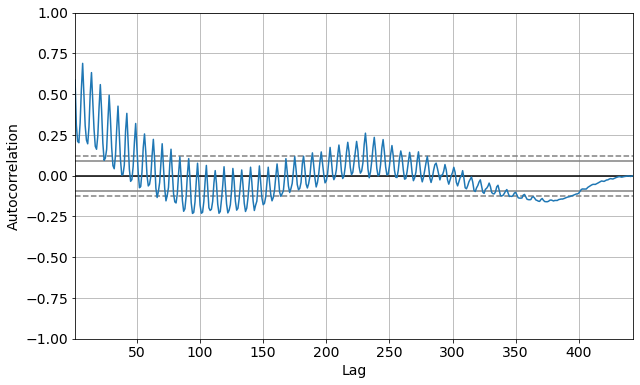

In [28]:
autocorrelation_plot(dados_sp['casos_novos'])

Esse gráfico mostra que há uma dependência temporal, indicando uma sazonalidade.

Agora vamos ver essa autocorrelação com os dados de forma aleatória:

In [29]:
dados_sp.shape

(443, 31)

In [30]:
aleatorio = np.random.rand(443)

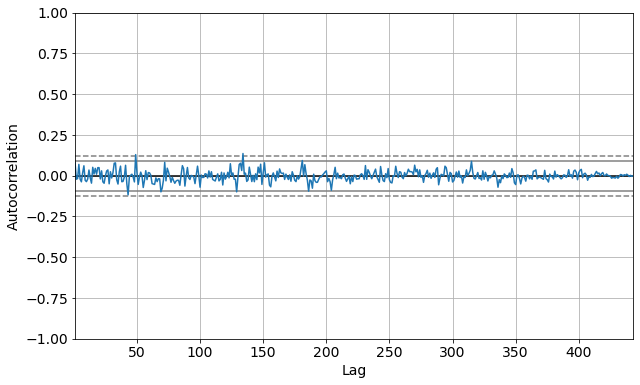

In [31]:
autocorrelation_plot(aleatorio)

Quando fazemos aleatoriamente não é possível verificar uma correlação expressiva, ou seja, não tem dependência temporal entre esses valores.

##**Desafio 01: Um notebook sem warnings.**

Utilizando o seguinte import: 

`import warnings`

`warnings.filterwarnings('ignore')`

##**Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.**

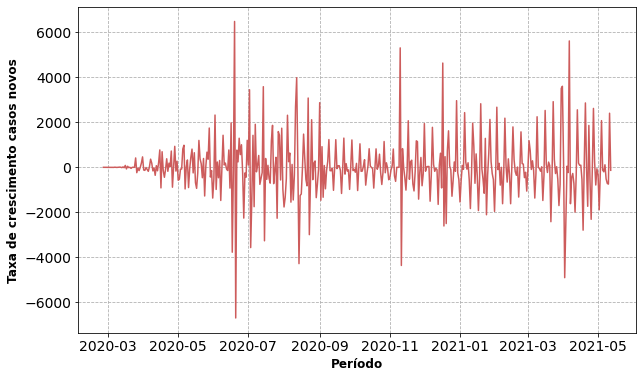

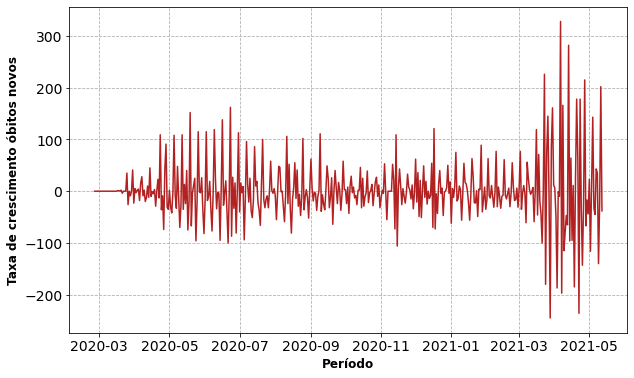

In [63]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp, color='indianred')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Taxa de crescimento casos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 360)
plt.grid(linestyle = '--')
plt.show()
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, color='firebrick')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Taxa de crescimento óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 360)
plt.grid(linestyle = '--')
plt.show()

Os picos de óbitos não coincidem totalmente com os picos de casos novos, pois eles dependem da data em que casos e óbitos foram notificados. Além disso, após os casos serem notificados o desenvolvimento de um quadro grave pode levar dias para acontecer. 

##**Desafio 03: Fazer melhorias nos gráficos.**

Gráfico de média de casos de SARS-CoV-2 acumulados no estado de São Paulo:

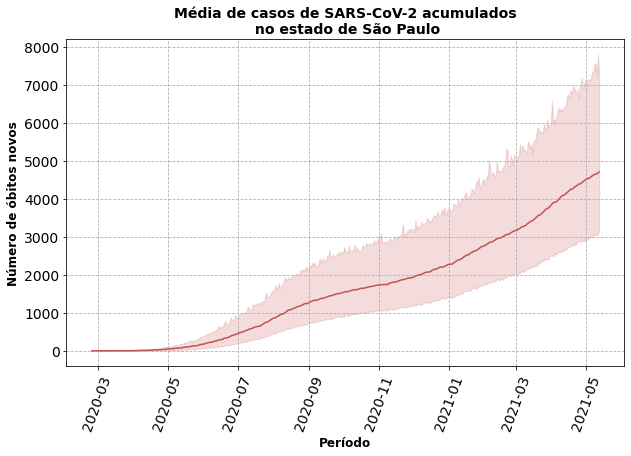

In [200]:
sns.lineplot(x='datahora', y='casos', data=dados, color=RED1)
plt.title('Média de casos de SARS-CoV-2 acumulados\n no estado de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
plt.show()

Gráfico mostrando a taxa de crescimento de casos novos de SARS-CoV-2 no município de São Paulo em 2021:

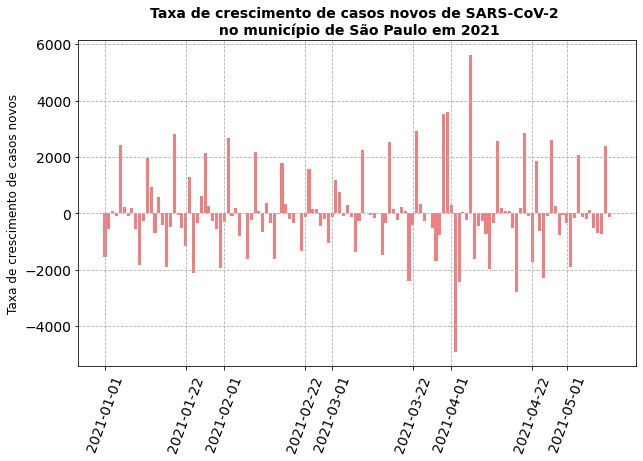

In [193]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'], color='lightcoral')
plt.title('Taxa de crescimento de casos novos de SARS-CoV-2 \n no município de São Paulo em 2021', fontsize=14, weight= 'bold')
plt.xlabel('')
plt.ylabel('Taxa de crescimento de casos novos', fontsize=12)
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
plt.show()

Gráficos mostrando os efeitos da sazonalidade nos casos novos de SARS-CoV-2 no município de São Paulo em janeiro e fevereiro de 2021:

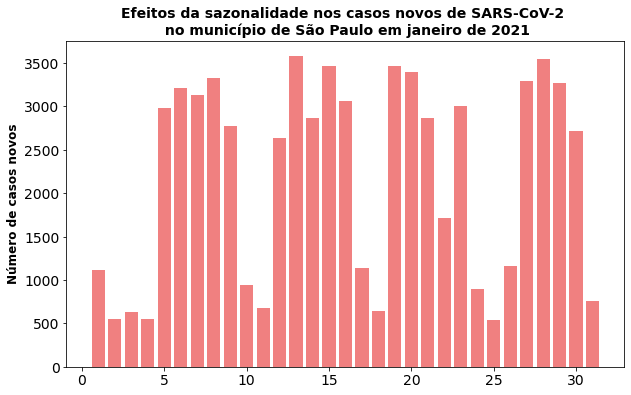

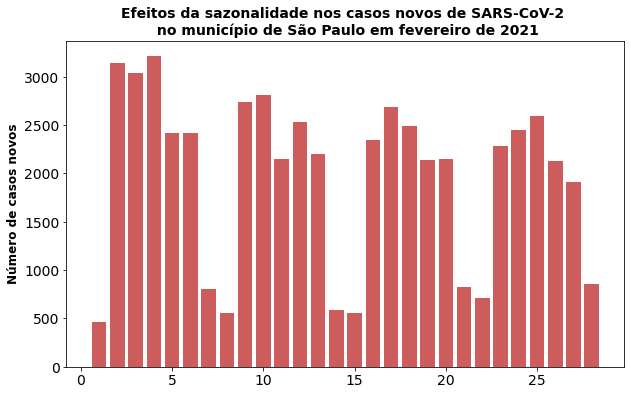

In [199]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'], color='lightcoral')
plt.title('Efeitos da sazonalidade nos casos novos de SARS-CoV-2 \n no município de São Paulo em janeiro de 2021', fontsize=14, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'], color='indianred')
plt.title('Efeitos da sazonalidade nos casos novos de SARS-CoV-2 \n no município de São Paulo em fevereiro de 2021', fontsize=14, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.show()

##**Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.**

Gráfico com a média movel do número de óbitos:

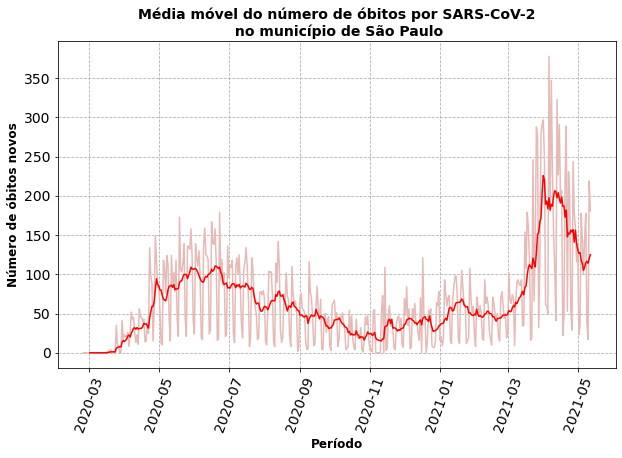

In [152]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp, color=RED2)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp, color= 'red')
plt.title('Média móvel do número de óbitos por SARS-CoV-2\n no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Gráfico de casos em barras:


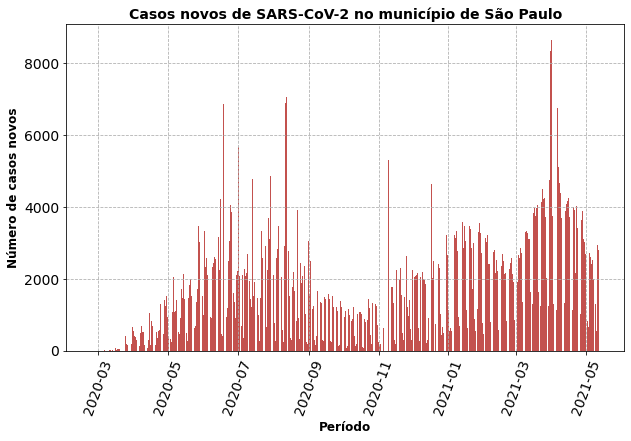

In [44]:
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'], color =RED1)
plt.title('Casos novos de SARS-CoV-2 no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Gráficos de barras com média móvel em linhas:

In [66]:
dados_sp['ano'] = dados_sp['datahora'].dt.year
dados_sp['mes'] = dados_sp['datahora'].dt.month
dados_sp_2021 = dados_sp.query('ano == 2021')

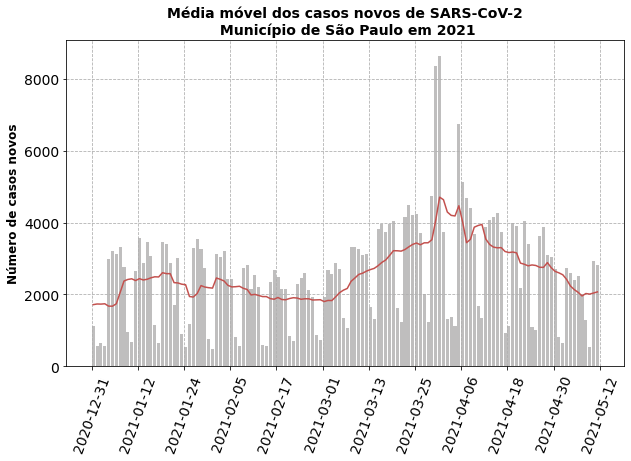

In [85]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(dados_sp_2021['datahora'], dados_sp_2021['casos_novos'], color =GRAY9)
ax.plot(dados_sp_2021['datahora'], dados_sp_2021['media_movel_casos'], color=RED1)
plt.title('Média móvel dos casos novos de SARS-CoV-2\n Município de São Paulo em 2021', fontsize=14, weight= 'bold')
plt.xlabel('', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

A linha vermelha representa a média móvel do número de óbitos novos.

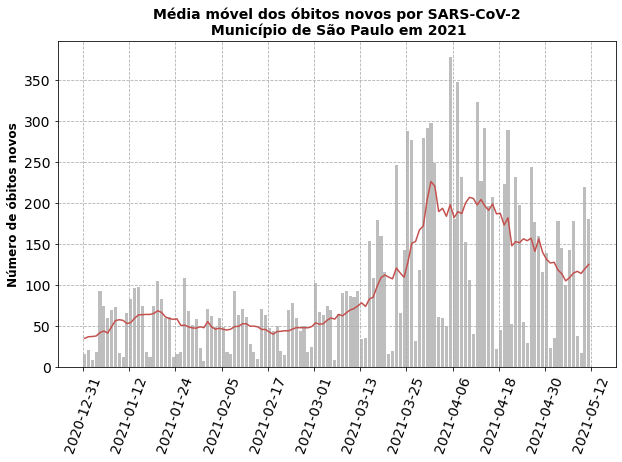

In [86]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(dados_sp_2021['datahora'], dados_sp_2021['obitos_novos'], color =GRAY9)
ax.plot(dados_sp_2021['datahora'], dados_sp_2021['media_movel_obitos'], color=RED1)
plt.title('Média móvel dos óbitos novos por SARS-CoV-2\n Município de São Paulo em 2021', fontsize=14, weight= 'bold')
plt.xlabel('', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

A linha vermelha representa a média móvel do número de óbitos novos.

##**Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.**

Comecei testando mover o número de óbitos por 14 dias:

In [146]:
dados_sp['obitos_dias_depois'] = dados_sp['obitos_novos'].shift(-14)


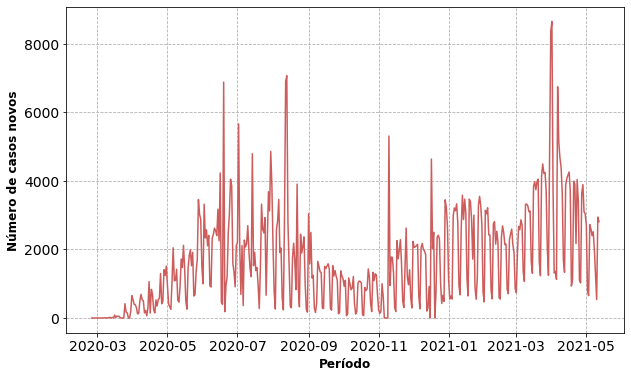

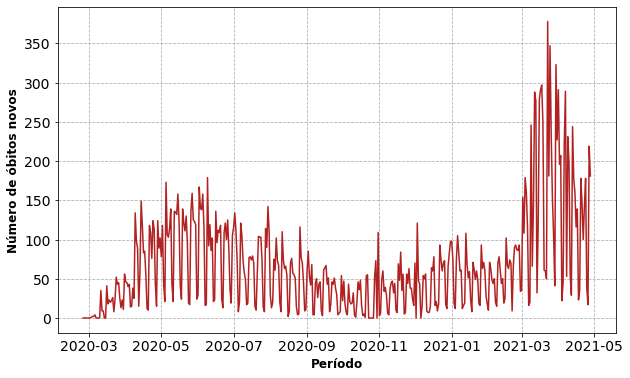

In [147]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp, color='indianred')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 360)
plt.grid(linestyle = '--')
plt.show()
sns.lineplot(x='datahora', y='obitos_dias_depois', data=dados_sp, color='firebrick')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 360)
plt.grid(linestyle = '--')
plt.show()

Quando movi por apenas 5 dias os picos ficaram mais próximos aos picos de casos novos:

In [148]:
dados_sp['obitos_dias_depois'] = dados_sp['obitos_novos'].shift(-5)

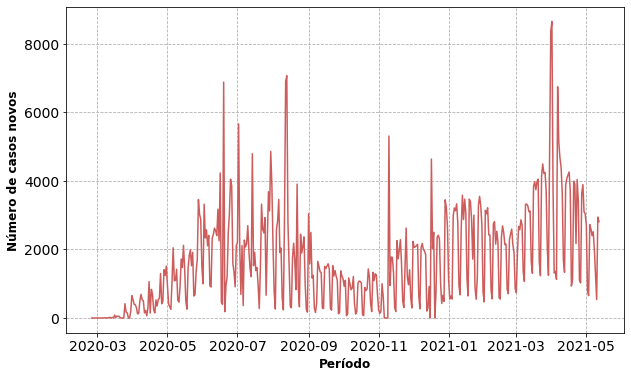

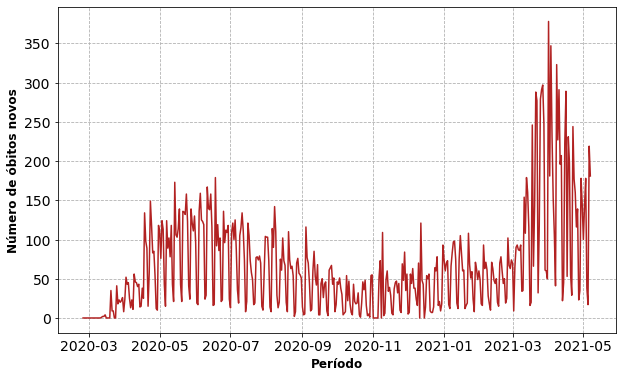

In [149]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp, color='indianred')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 360)
plt.grid(linestyle = '--')
plt.show()
sns.lineplot(x='datahora', y='obitos_dias_depois', data=dados_sp, color='firebrick')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 360)
plt.grid(linestyle = '--')
plt.show()

##**Desafio 06: Função de correlação cruzada dos óbitos e casos.**


In [87]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

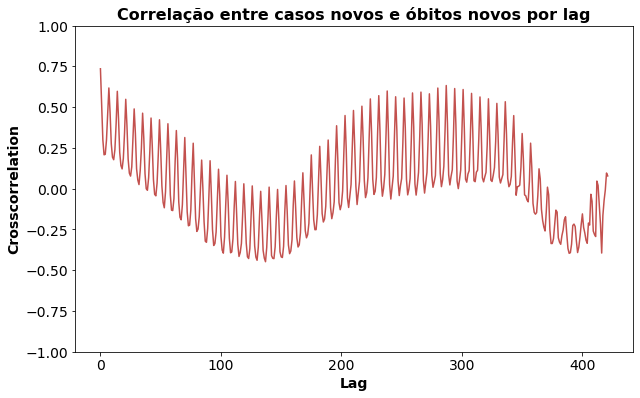

In [115]:
y_corr = [crosscorr(dados_sp['casos_novos'], dados_sp['obitos_novos'], lag) for lag in range(0,len(dados_sp))]
x_lag = range(0,len(dados_sp))
plt.plot(x_lag, y_corr, color=RED1)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos por lag', weight='bold', fontsize=16)
plt.xlabel('Lag', fontsize=14, weight='bold')
plt.ylabel('Crosscorrelation', fontsize=14, weight='bold')
plt.show()

##**Desafio 07: Estudar outros municípios.**

In [39]:
# Configuração das cores utilizadas nos gráficos: 
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'

Escolhi o município onde eu moro:

In [47]:
dados_sa = dados.query('nome_munic == "Santo André"')

Gráficos em subplots, comparando a escala do eixo y linear com a escala do eixo y em log:

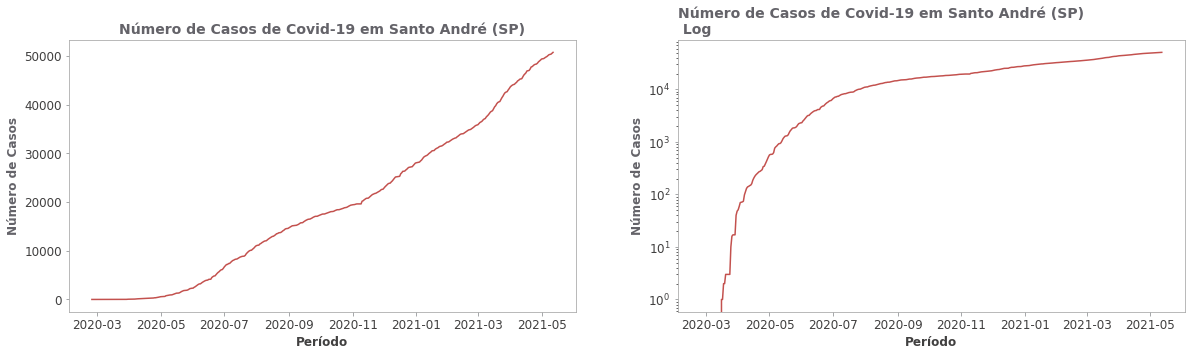

In [52]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

sns.lineplot(x='datahora', y='casos', data=dados_sa, ax=axs[0], color=RED1)

sns.lineplot(x='datahora', y='casos', data=dados_sa, ax=axs[1], color=RED1)
mpl.pyplot.yscale('log') 

axs[0].set_title('Número de Casos de Covid-19 em Santo André (SP)', weight='bold', fontsize=14, color = GRAY4)

axs[1].set_title('Número de Casos de Covid-19 em Santo André (SP)\n Log', loc='left', weight='bold', fontsize=14, color = GRAY4)

axs[0].tick_params(labelrotation=360, labelcolor = GRAY2, labelsize=12)
axs[1].tick_params(labelrotation=360, labelcolor = GRAY2, labelsize=12)
axs[0].set_xlabel('Período', color = GRAY2, fontsize=12, weight='bold')
axs[1].set_xlabel('Período', color = GRAY2, fontsize=12, weight='bold')
axs[0].tick_params(color=GRAY7)
axs[0].spines['bottom'].set_color('darkgrey')
axs[0].spines['left'].set_color('darkgrey')
axs[0].spines['right'].set_color('darkgrey')
axs[0].spines['top'].set_color('darkgrey')
axs[0].set_ylabel('Número de Casos',  fontsize = 12, color = GRAY4,  weight='bold')
axs[1].tick_params(color=GRAY7)
axs[1].spines['bottom'].set_color('darkgrey')
axs[1].spines['left'].set_color('darkgrey')
axs[1].spines['right'].set_color('darkgrey')
axs[1].spines['top'].set_color('darkgrey')
axs[1].set_ylabel('Número de Casos',  fontsize = 12, color = GRAY4,  weight='bold')

plt.show()

Gráfico em barras de casos novos em Santo André:

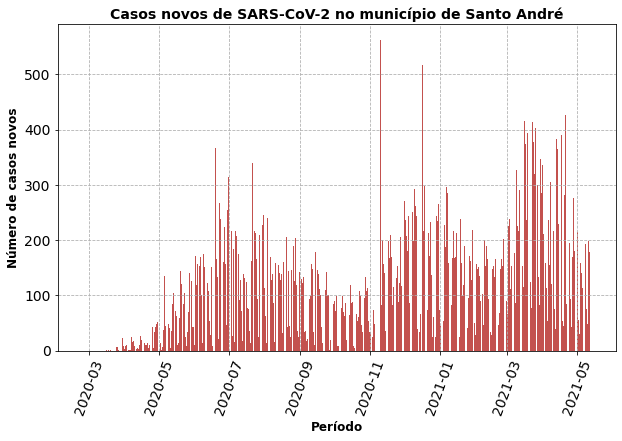

In [111]:
plt.bar(dados_sa['datahora'], dados_sa['casos_novos'], color =RED1)
plt.title('Casos novos de SARS-CoV-2 no município de Santo André', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Análise da média móvel de novos casos e óbitos em Santo André:

In [55]:
dados_sa['media_movel_casos'] = dados_sa['casos_novos'].rolling(window=7, center=False).mean()
dados_sa['media_movel_obitos'] = dados_sa['obitos_novos'].rolling(window=7, center=False).mean()

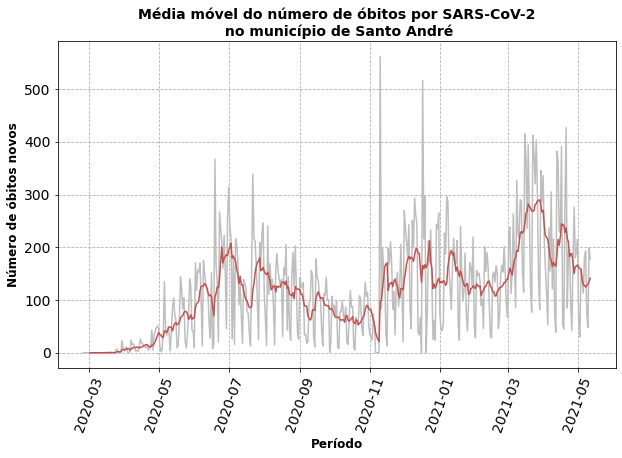

In [170]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sa, color=GRAY9)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sa, color=RED1)
plt.title('Média móvel do número de óbitos por SARS-CoV-2\n no município de Santo André', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

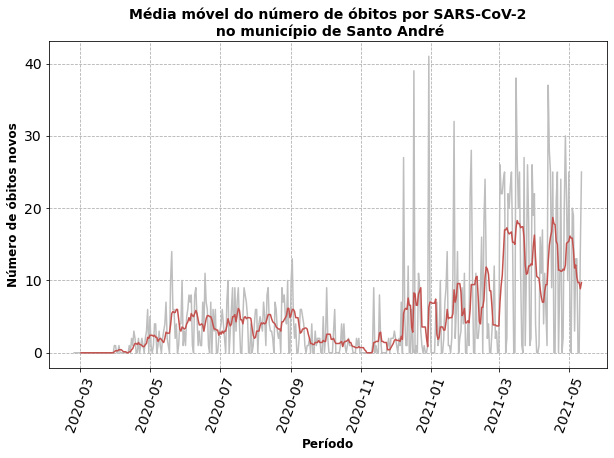

In [171]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sa, color=GRAY9)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sa, color=RED1)
plt.title('Média móvel do número de óbitos por SARS-CoV-2\n no município de Santo André', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.xticks(rotation = 70)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Correlação entre óbitos e casos em Santo André:

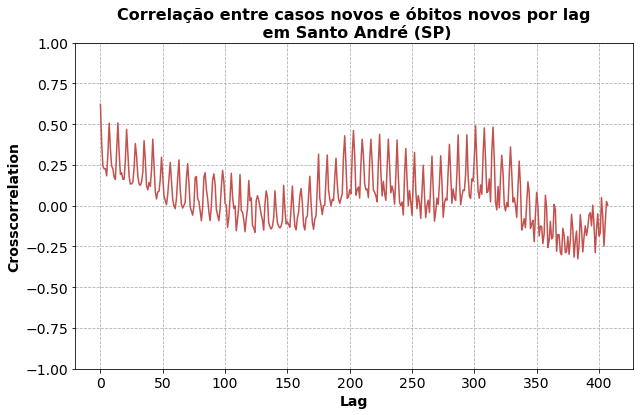

In [169]:
y_corr = [crosscorr(dados_sa['casos_novos'], dados_sa['obitos_novos'], lag) for lag in range(0,len(dados_sa))]
x_lag = range(0,len(dados_sa))
plt.plot(x_lag, y_corr, color=RED1)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos por lag\n em Santo André (SP)', weight='bold', fontsize=16)
plt.xlabel('Lag', fontsize=14, weight='bold')
plt.ylabel('Crosscorrelation', fontsize=14, weight='bold')
plt.grid(linestyle = '--')
plt.show()